# Анализ продуктовых метрик 

Необходиом провести анализ наиболее важных метрик, которые позволяют с разных сторон оценить то, насколько хорошо работает сервис.

Для анализа и составления SQL-запросов используется следующая схема базы данных.

Обозначения полей:
- order_id - id заказа;
- product_id - id продукта;
- product_ids - массив с id продуктов, купленных в одном заказе;
- user_id - id клиента;
- courier_id - id курьера;
- time, creation_time - время соверешения действия;
- sex - пол;
- name - наименование продукта;
- price - цена продукта;
- action - тип дейтствия (для клиента: 'create_order' и 'cancel_order'; для курьера: 'accept_order', 'deliver_order')

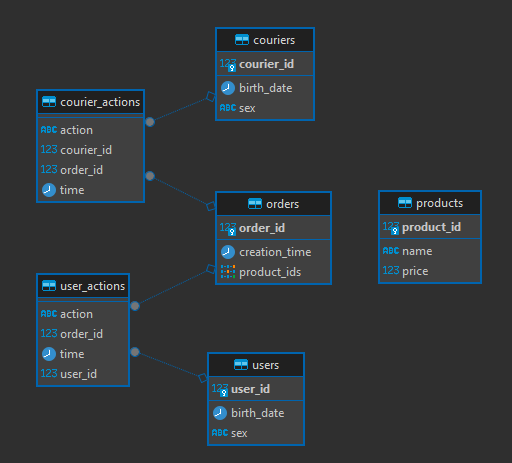

## Экономика продукта

### Анализ выручки

Для каждого дня в таблице orders рассчитать следующие показатели:

- Выручку, полученную в этот день
- Суммарную выручку на текущий день
- Прирост выручки, полученной в этот день, относительно значения выручки за предыдущий день

Будем считать, что оплата за заказ поступает сразу же после его оформления, т.е. случаи, когда заказ был оформлен в один день, а оплата получена на следующий, возникнуть не могут.

Суммарная выручка на текущий день — это результат сложения выручки, полученной в текущий день, со значениями аналогичного показателя всех предыдущих дней.

При расчёте выручки помните, что не все заказы были оплачены — некоторые были отменены пользователями.

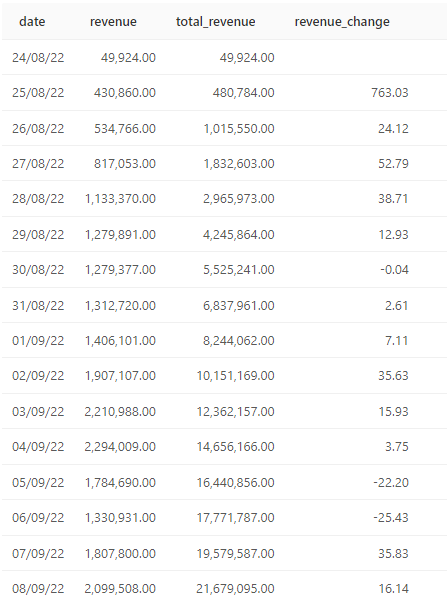

**_Динамика ежедневной выручки_**:
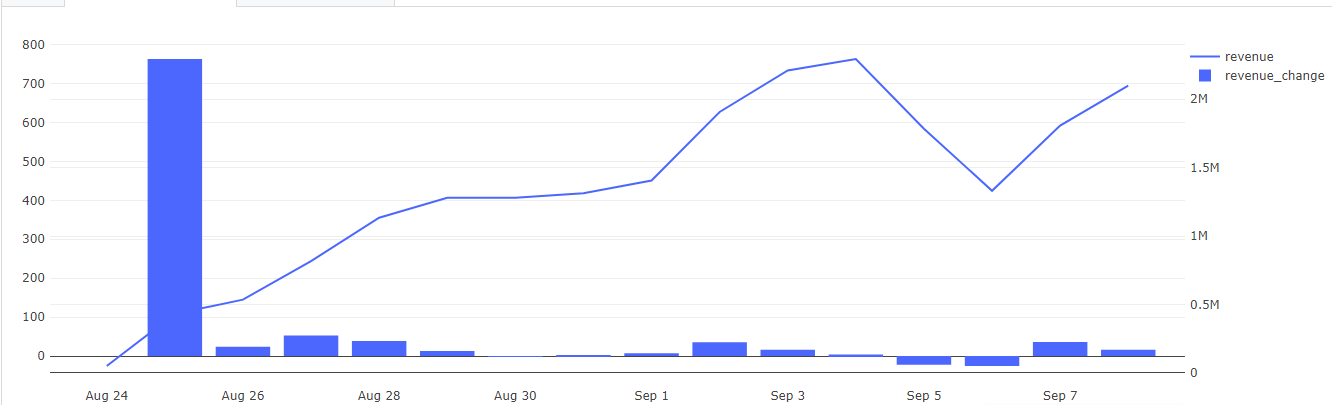

**_Динамика общей выручки_**:
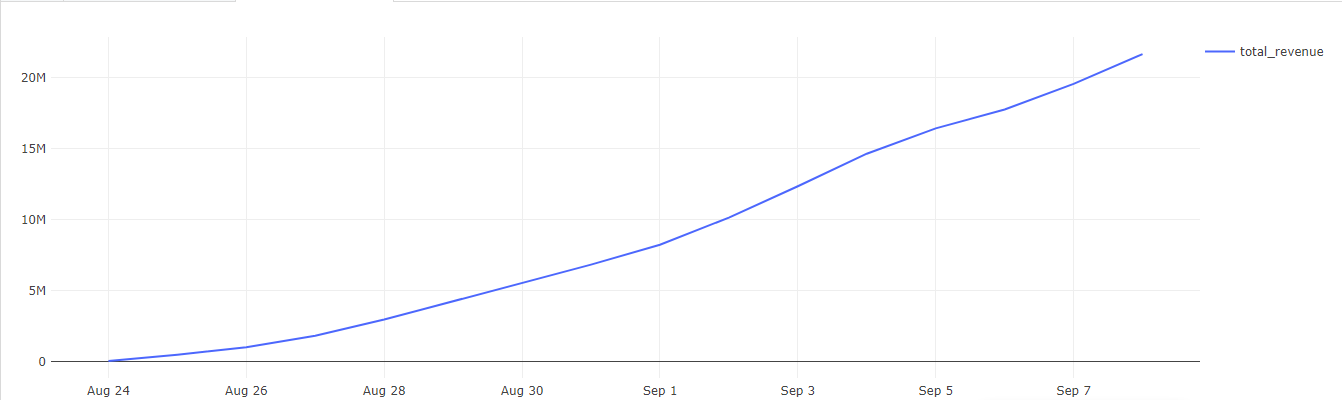

C 5 по 6 сентября наблюдалось заметное снижение выручки.

Исходя из графиков прошлого отчета о клиентах в эти дни наблюдался серьезный упадок новых и платящих клиентов

### Анализ ARPU, ARPPU, AOV

На основе данных о выручке можно рассчитать несколько относительных показателей, которые покажут, сколько в среднем потребители готовы платить за услуги сервиса доставки.

Для каждого дня рассчитать следующие показатели:

- Выручку на пользователя (ARPU) за текущий день
- Выручку на платящего пользователя (ARPPU) за текущий день
- Выручку с заказа, или средний чек (AOV) за текущий день

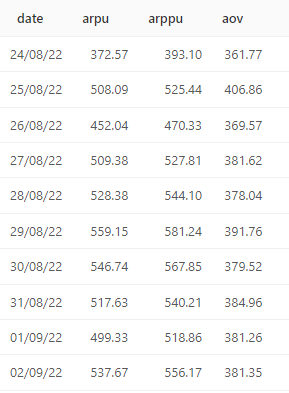

**_Динамика ARPU, ARPPU, AOV_**:
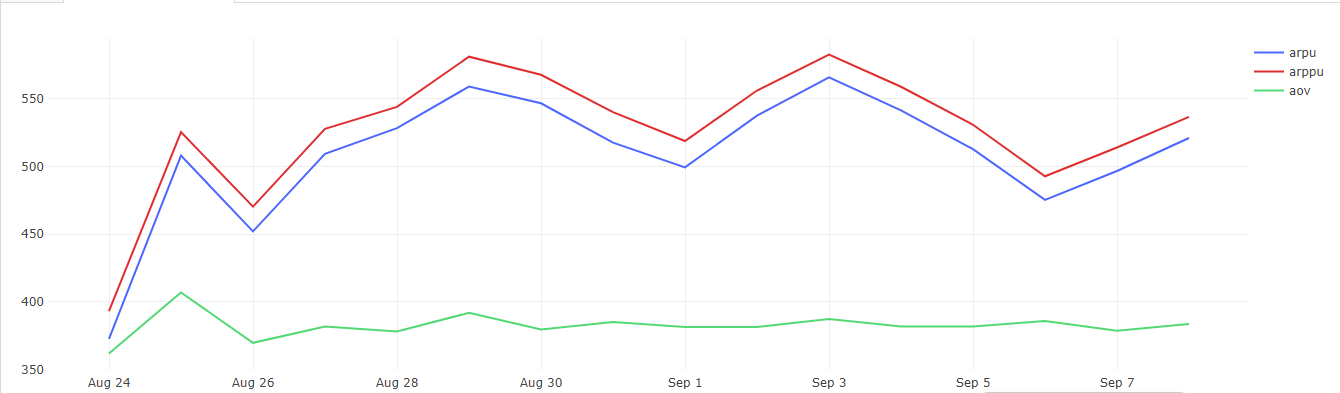

Метрики ARPU и ARPPU за определенный день имеют больльший разброс значений по сравнению с метрикой среднего чека AOV.

Метрики не имеют аномально выскоих или низких значений в отдельные дни.

Соотношение числа платящих пользователей и всех пользователей сервиса имеют практически полную корреляцию.

### Анализ накопленных динамических ARPU, ARPPU, AOV

Дополним анализ дополнительными расчётами — вычислим те же метрики, но с учетом для каждого дня накопленную выручки. Таким образом, получится узнать динамический ARPU, ARPPU и AOV.

По таблицам orders и user_actions для каждого дня рассчитать следующие показатели:

- Накопленную выручку на пользователя (Running ARPU)
- Накопленную выручку на платящего пользователя (Running ARPPU)
- Накопленную выручку с заказа, или средний чек (Running AOV)

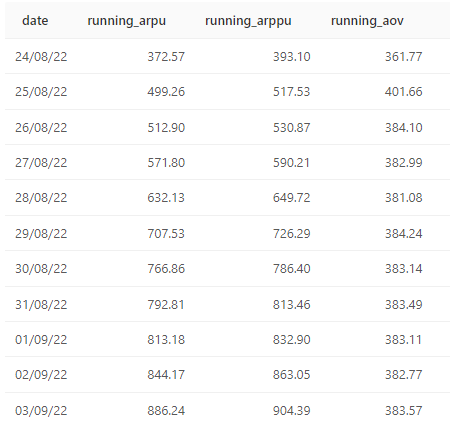

**_Динамика накопления ARPU, ARPPU, AOV_**
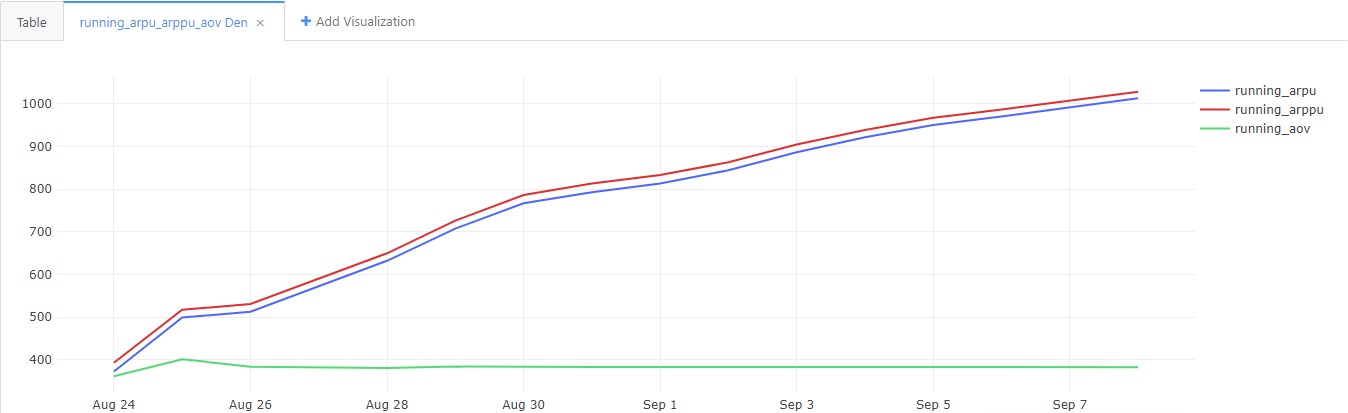

На основе текущиз данных можно сделать вывод что метрики Running ARPU и Running ARPPU с каждым днем растут, однако метрика AOV(средний чек) остается на одном уровне.

На основе динамики рассчитанных метрик, учитывая, что показатель среднего чека (AOV) остается на одном уровне, а вырчка на платящего пользователя (ARPPU) растет, можно предположить, что  что со временем растёт число заказов на одного пользователя.

### Анализ  ARPU, ARPPU, AOV по дням недели

Рассчитаем те же показатели, но в другом разрезе — по дням недели.

Для каждого дня недели рассчитать следующие показатели:

- Выручку на пользователя (ARPU)
- Выручку на платящего пользователя (ARPPU)
- Выручку на заказ (AOV)

При расчётах учитывайте данные только за период с 26 августа по 8 сентября включительно — так, чтобы в анализ попало одинаковое количество всех дней недели (ровно по два дня).

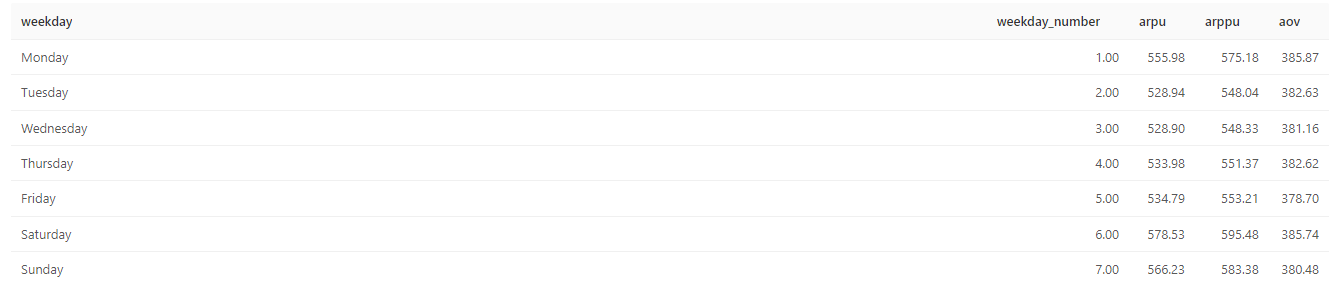

**_Динамика ARPU, ARPPU, AOV по дням недели_**:
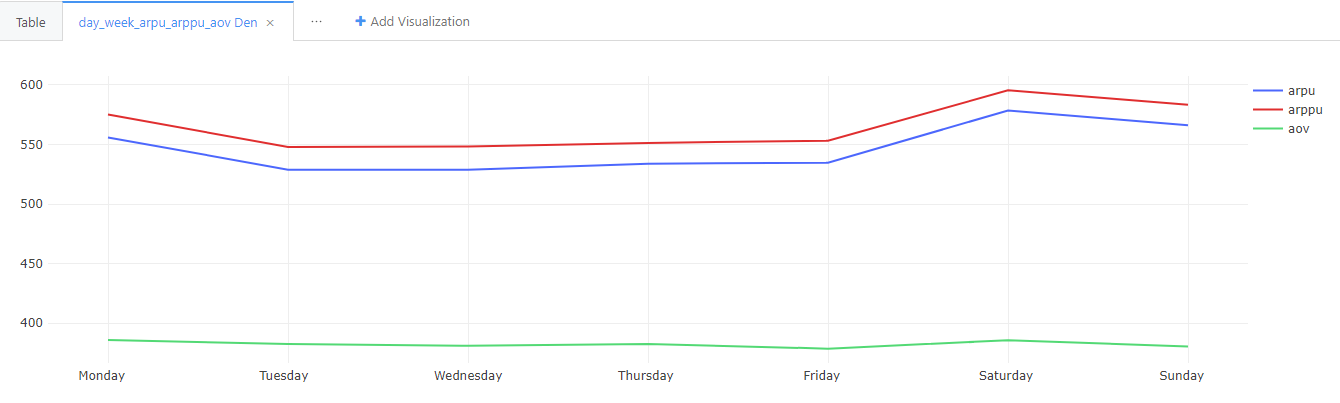

Метрики ARPU и ARPPU принимали наибольшие значения в понедельник (Monday), и в выходные дни субботу (Saturday) и воскресенье (Sunday), что в целом согласуется со стандартным поведением большинства пользователей сервиса доставки продуктов, которые заказывают их на выходные, поскольку чаще принимают пищу дома, а также в воскресенье и понедельник закупают основную  еду сразу на следующую неделю.

Несмотря на то, что в те дни, когда метрики ARPU и ARPPU принимали наибольшие значения, метрика AOV оставалась примерно на том же уровне. Наиболее вероятно это связано с тем, что увеличивается количество заказов на одного платящего пользователя.

### Анализ ежедневной выручки с заказов новых пользователей

Отдельно посчитаем ежедневную выручку с заказов новых пользователей сервиса, чтобы узнать какую долю она составляет в общей выручке с заказов всех пользователей — и новых, и старых.

Для каждого дня рассчитать следующие показатели:

- Выручку, полученную в этот день
- Выручку с заказов новых пользователей, полученную в этот день
- Долю выручки с заказов новых пользователей в общей выручке, полученной за этот день
- Долю выручки с заказов остальных пользователей в общей выручке, полученной за этот день

Новыми будем считать тех пользователей, которые в данный день совершили своё первое действие в нашем сервисе.

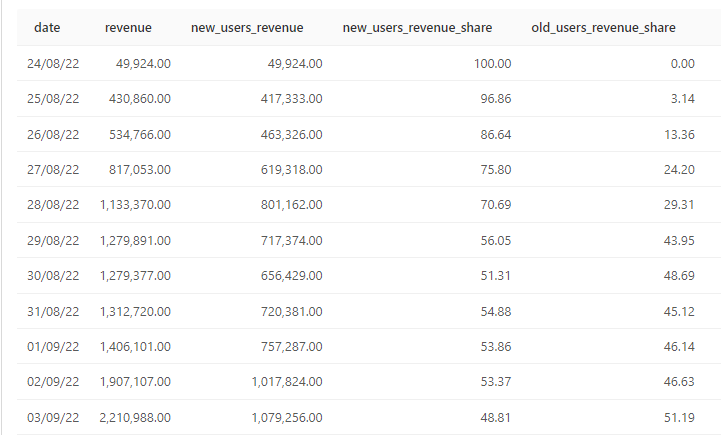

**_Отношение ежедневной выручки новых и старых пользователей_**:
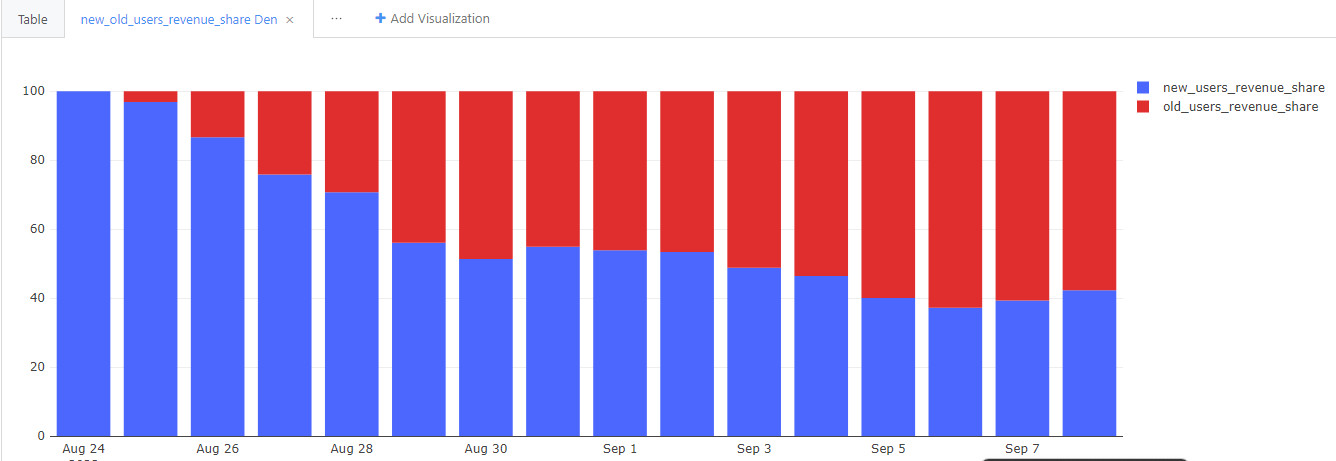

Спустя две недели после запуска сервиса показатель выручки от новых пользователей по-прежнему на довольно высоком уровне - около 40 %. По последним дням видно, что данный показатель стабилизировался.

### Анализ спроса на товары

Важно также узнать, какие товары пользуются наибольшим спросом и приносят основной доход.

Для каждого товара за весь период времени рассчитаnm следующие показатели:

- Суммарную выручку, полученную от продажи этого товара за весь период
- Долю выручки от продажи этого товара в общей выручке, полученной за весь период

Товары, округлённая доля которых в выручке составляет менее 0.5%, объединены в общую группу с названием «ДРУГОЕ».

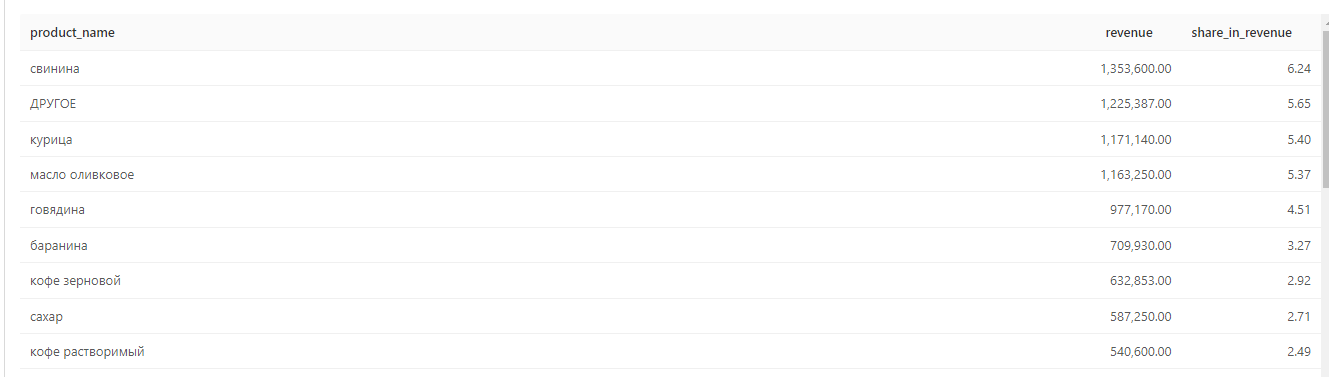

**_Товары от наибольшего спроса к наименьшему_**:
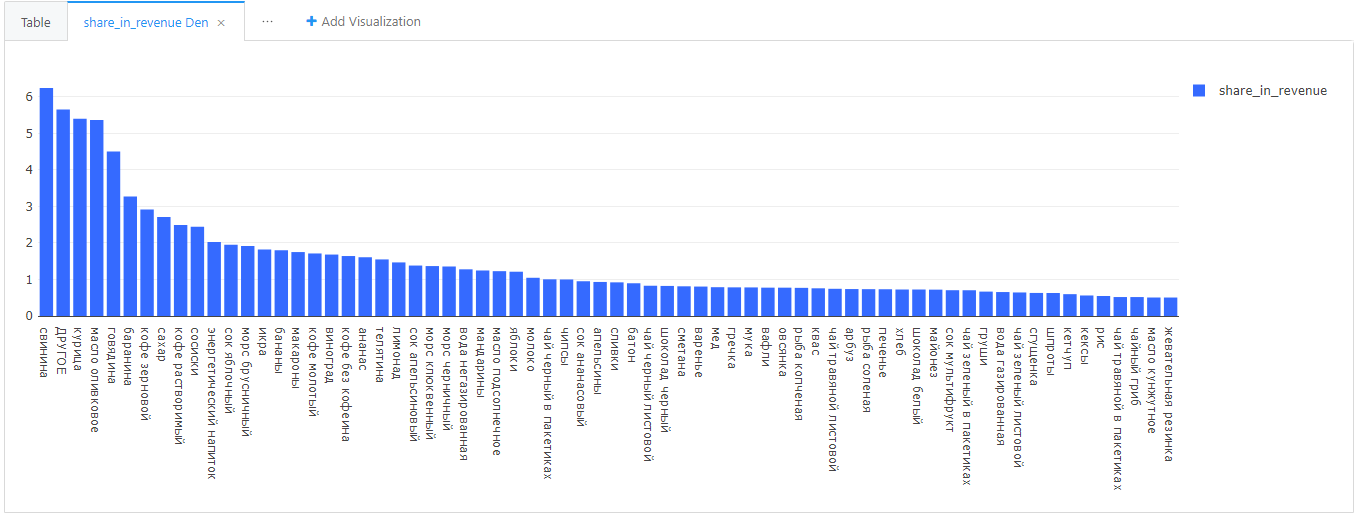

Наиболее высокой по доле в общей выручке оказалась категория "мясо".

### Анализ затрат и расчет валовой прибыли

Учтем в расчётах затраты с налогами и посчитаем валовую прибыль, то есть ту сумму, которую мы фактически получили в результате реализации товаров за рассматриваемый период.

Для каждого дня рассчитать следующие показатели:

- Выручку, полученную в этот день.
- Затраты, образовавшиеся в этот день.
- Сумму НДС с продажи товаров в этот день.
- Валовую прибыль в этот день (выручка за вычетом затрат и НДС).
- Суммарную выручку на текущий день.
- Суммарные затраты на текущий день.
- Суммарный НДС на текущий день.
- Суммарную валовую прибыль на текущий день.
- Долю валовой прибыли в выручке за этот день (долю п.4 в п.1).
- Долю суммарной валовой прибыли в суммарной выручке на текущий день (долю п.8 в п.5).

При расчёте переменных затрат учитываются следующие условия:

1. Затраты на сборку учитываются в том же дне, когда был оформлен заказ. Сборка отменённых заказов не производится.

2. Выплата курьерам за доставленный заказ начисляется сразу же после его доставки, поэтому если курьер доставит заказ на следующий день, то и выплата будет учтена в следующем дне.

3. Для получения бонусной выплаты курьерам необходимо доставить не менее 5 заказов в течение одного дня, поэтому если курьер примет 5 заказов в течение дня, но последний из них доставит после полуночи, бонусную выплату он не получит.

При расчёте НДС для некоторых товаров налог составляет 10%, а не 20%.


Чтобы посчитать затраты обозначим дополнительные условия.

В упрощённом виде затраты сервиса будем считать как сумму постоянных и переменных издержек. К постоянным издержкам отнесём аренду складских помещений, а к переменным — стоимость сборки и доставки заказа. Таким образом, переменные затраты будут напрямую зависеть от числа заказов.

Из данных известно, что в августе 2022 года постоянные затраты составляли 120 000 рублей в день. Однако уже в сентябре сервису потребовались дополнительные помещения, и поэтому постоянные затраты возросли до 150 000 рублей в день.

Также известно, что в августе 2022 года сборка одного заказа обходилась в 140 рублей, при этом курьерам платили по 150 рублей за один доставленный заказ и ещё 400 рублей ежедневно в качестве бонуса, если курьер доставлял не менее 5 заказов в день. В сентябре продакт-менеджерам удалось снизить затраты на сборку заказа до 115 рублей, но при этом пришлось повысить бонусную выплату за доставку 5 и более заказов до 500 рублей, чтобы обеспечить более конкурентоспособные условия труда. При этом в сентябре выплата курьерам за один доставленный заказ осталась неизменной.

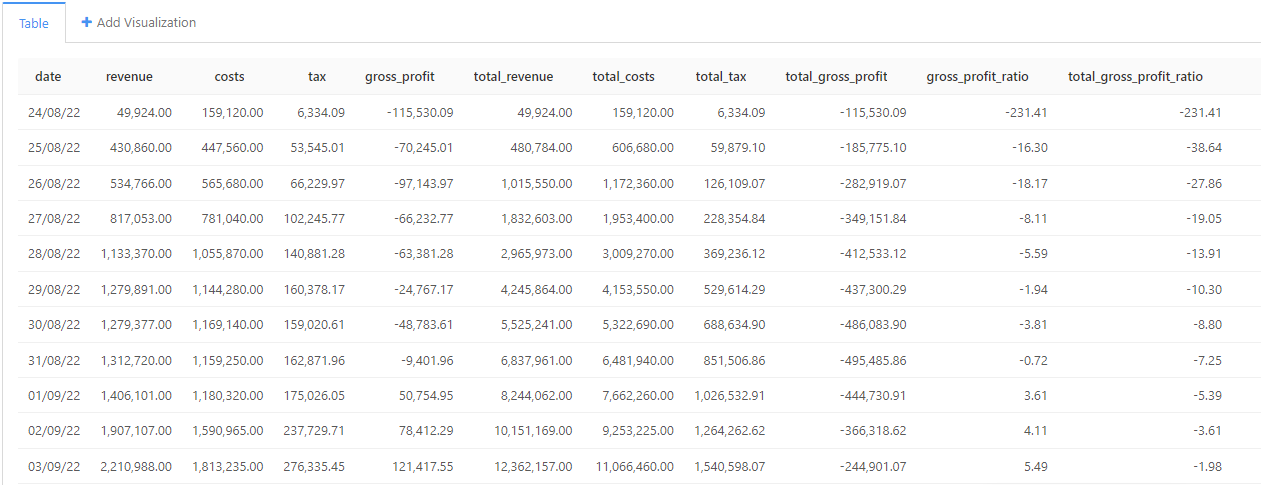

**_Динамика валовой прибыли на текущий день и доли валовой прибыли в выручке за этот день_**:
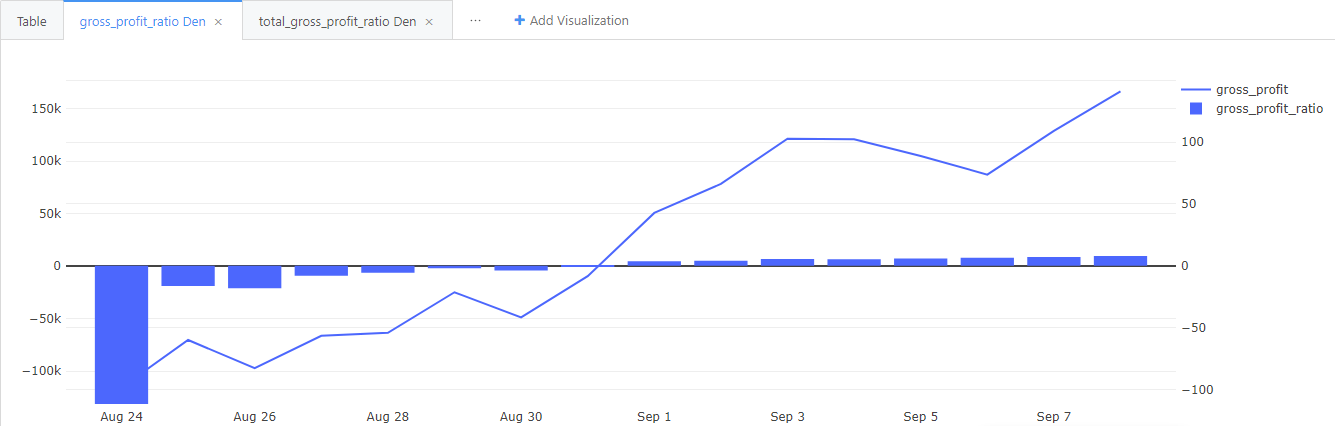

**_Динамика cуммарной валовой прибыль на текущий день и доли суммарной валовой прибыли в суммарной выручке на текущий день_**:
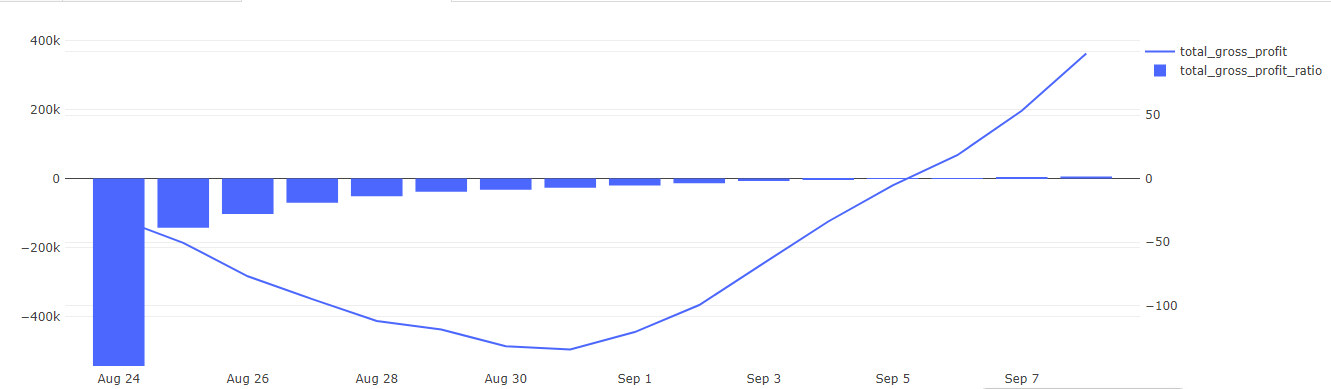

Начиная с 31 августа валовая прибыль сервиса стала положительной.

6 сентября суммарная валовая прибыль превысила нулевую отметку и сервис впервые «вышел в плюс» по этому показателю.

Возможно оптимизация стоимости сборки заказа в сентябре позволила увидеть в сентябре положительную валовую прибыль.

## Маркетинговые метрики

В рекламной кампании № 1 о нашем приложении рассказал известный блогер. На эту интеграцию суммарно потратили 250 тысяч рублей. В результате этой кампании 1 сентября в приложении зарегистрировался 171 человек.

В рамках рекламной кампании № 2 пользователям показывали таргетированную рекламу в социальных сетях. На это тоже суммарно потратили 250 тысяч рублей, и в результате 1 сентября у нас появилось 236 новых пользователей.

Необходимо выявить, какая кампания оказалась более продуктивной.

### Анализ метрики CAC (Customer Acquisition Cost)

CAC (Customer Acquisition Cost) - метрика, которая отражает затраты на привлечение одного покупателя.

На основе таблицы user_actions рассчитайте метрику CAC для двух рекламных кампаний.

Список id пользователей, пришедших после рекламной кампании № 1:

8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741, 
8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845, 
8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972, 
8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071, 
9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175, 
9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317, 
9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472, 
9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550, 
9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654, 
9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762, 
9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871, 
9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998, 
9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103, 
10105, 10122, 10134, 10135


Список id пользователей, пришедших после рекламной кампании № 2:

8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681, 
8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754, 
8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851, 
8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929, 
8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000, 
9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117, 
9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203, 
9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289, 
9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383, 
9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497, 
9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567, 
9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692, 
9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757, 
9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863, 
9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930, 
9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058, 
10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131

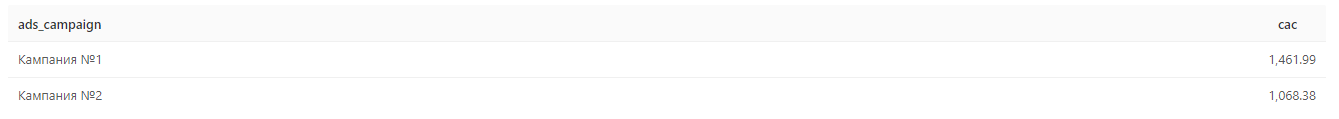

**_Сравнение метрики CAC двух рекламных кампаний_**
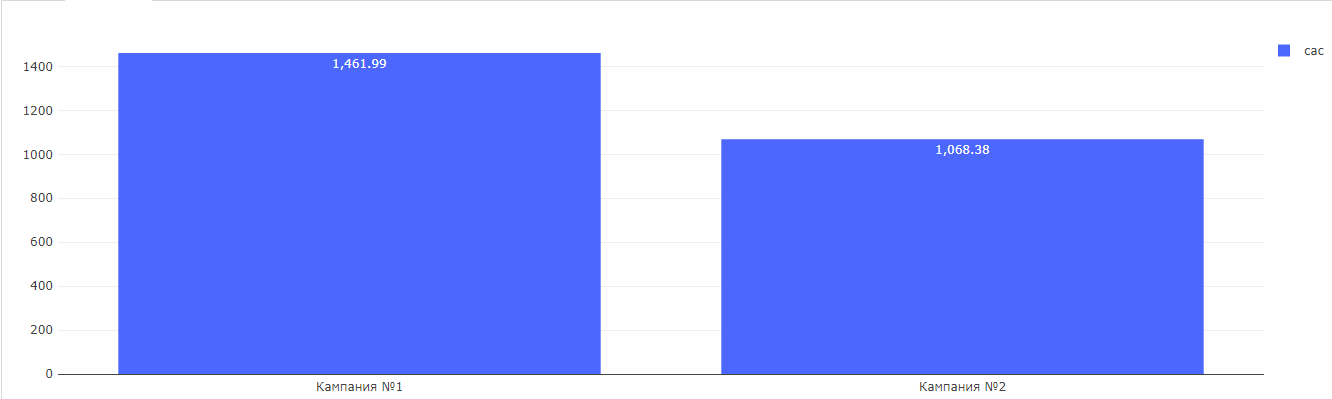

У рекламной кампании №2 затраты на привлечение одного покупателя оказались ниже.

### Анализ метрики ROI (Return on Investment)

После расчета CAC мы не можем утверждать, что вторая рекламная кампания лучше только потому, что позволяет привлекать платящих пользователей за меньшие деньги.

Оценим ещё один показатель ROI (Return on Investment), который отражает рентабельность инвестиций и показывает, насколько выгодным является тот или иной проект или продукт.


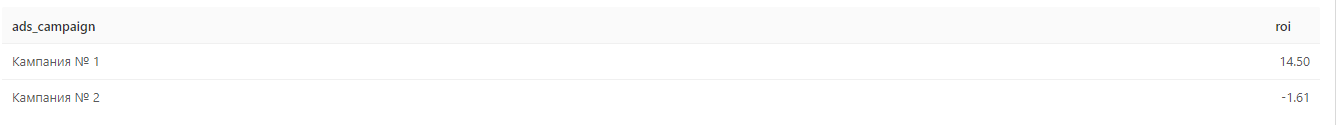

**_Сравнение метрики ROI двух рекламных кампаний_**
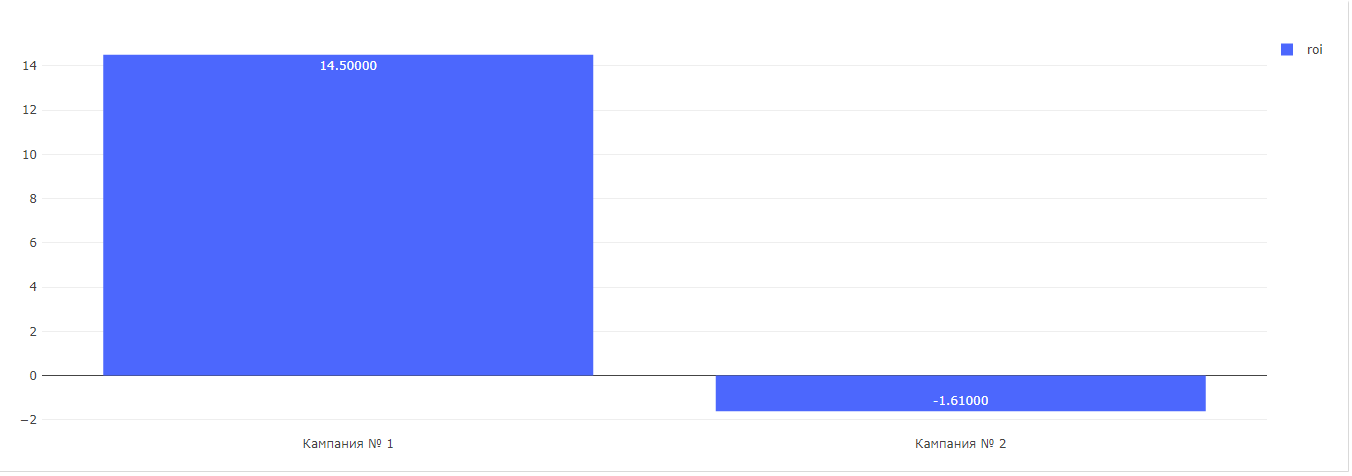

По показателю ROI рекламная компания №1 является более окупаемой чем кампания №2, следовательно первая кампания привлекла более качественных лидов.

### Анализ среднего чека 

Выявлено, что первая рекламная кампания позволяет привлекать более качественных лидов. Но причина этих различий пока не совсем ясна. 

Проверим разницу в среднем чеке лидов из двух кампаний.

То есть необходимо для каждой рекламной кампании посчитать среднюю стоимость заказа привлечённых пользователей за первую неделю использования приложения с 1 по 7 сентября.

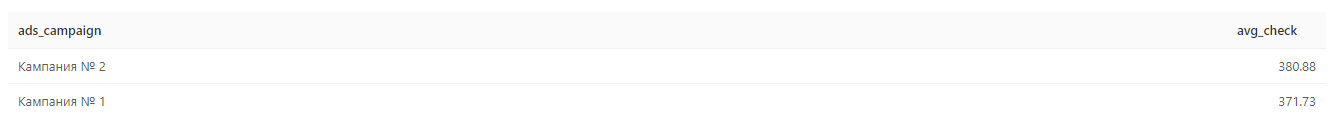

**_Сравнение среднего чека двух рекламных кампаний_**:
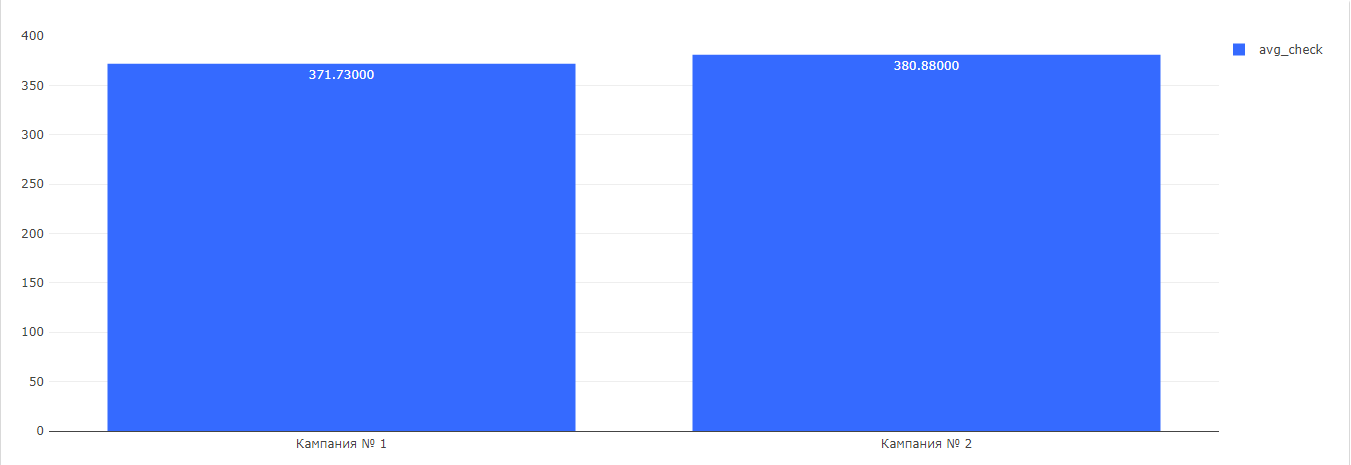

Средний чек лидов двух рекламных кампаний находится примерно на одном уровне.

### Анализ RETENTION

По среднему чеку непонятно, почему ROI первой кампании выше. Еще одним важным показателем является — Retention rate.

Retention rate — коэффициент удержания клиентов. Он показывает долю пользователей, которые вернулись в приложение спустя N дней, недель или месяцев после своего первого входа — метрику можно рассчитывать по любым периодам, которые интересуют.

В случае нашего сервиса доставки высокий Retention означает, что пользователи часто возвращаются, чтобы сделать повторный заказ. Низкий Retention, напротив, говорит о том, что большинство пользователей уходят в отток после одного или нескольких взаимодействий. Возможно, им неудобно пользоваться нашим приложением, или же их не устраивают цены, ассортимент товаров, скорость или стоимость доставки — причины могут быть самые разные, и чтобы их установить, нужны дополнительные исследования.

Таким образом, метрика Retention отражает ценность нашего продукта в глазах пользователей: если они возвращаются к нам с определённой периодичностью, значит, наш продукт помогает им решать свои задачи.

**Расчет Retention для всех пользователей в разрезе даты первого взаимодействия с нашим приложением**

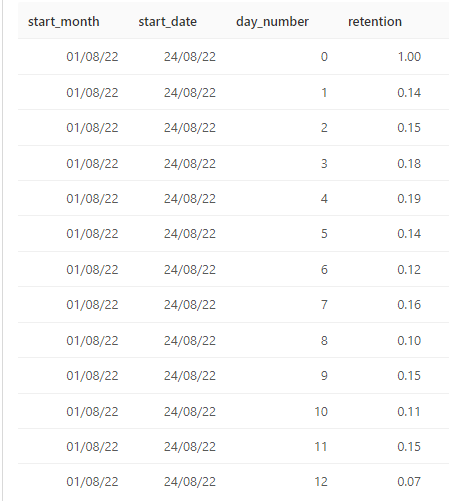

**_Retention всех пользователей по дате первого взаимодействия_**
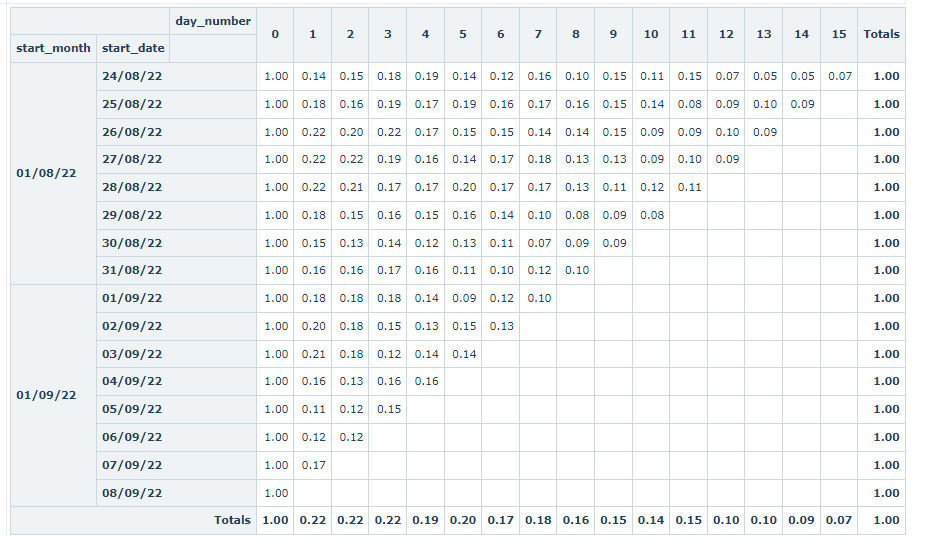

**Расчет Retention для двух групп пользователей рекламных кампаний**

Для каждой рекламной кампании рассчитать Retention 1-го и 7-го дня у привлечённых пользователей. 

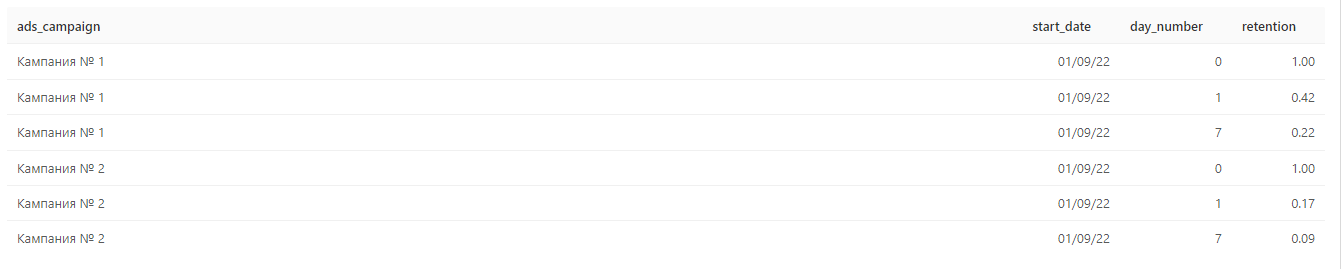

**_Retention двух групп пользователей рекламных кампаний 1 и 7 дня_**
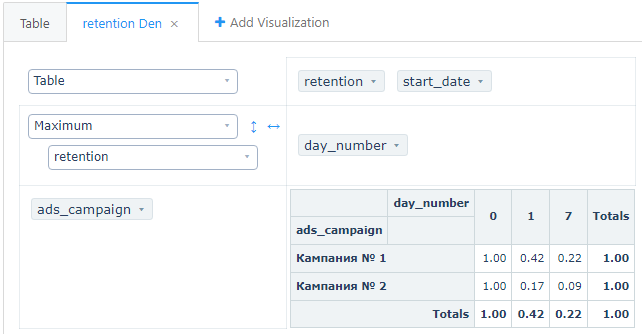

Пользователи из обоих рекламных каналов практически не различаются по среднему чеку, но Retention почти в два раза выше у первой группы. Это и приводит к тому, что пользователи из первой группы приносят нам больше денег.



### Анализ окупаемости рекламных кампаний

Необходимо рассчитать на какой день доход от заказов покупателей, пришедших после рекламных кампаний, превысит расходы на их привлечение. Для этого необходимо рассчитать накопительный ARPPU и сравнить его с уже посчитанной ранее метрикой CAC (затраты на привлечение одного покупателя). 

Суть расчёта накопительного ARPPU заключается в том, что для каждого дня число покупателей в когорте будет оставаться неизменным, а полученный от их заказов доход — расти. В результате накопительный ARPPU будет постепенно увеличиваться и в какой-то момент превысит сумму изначальных затрат на привлечение одного покупателя.

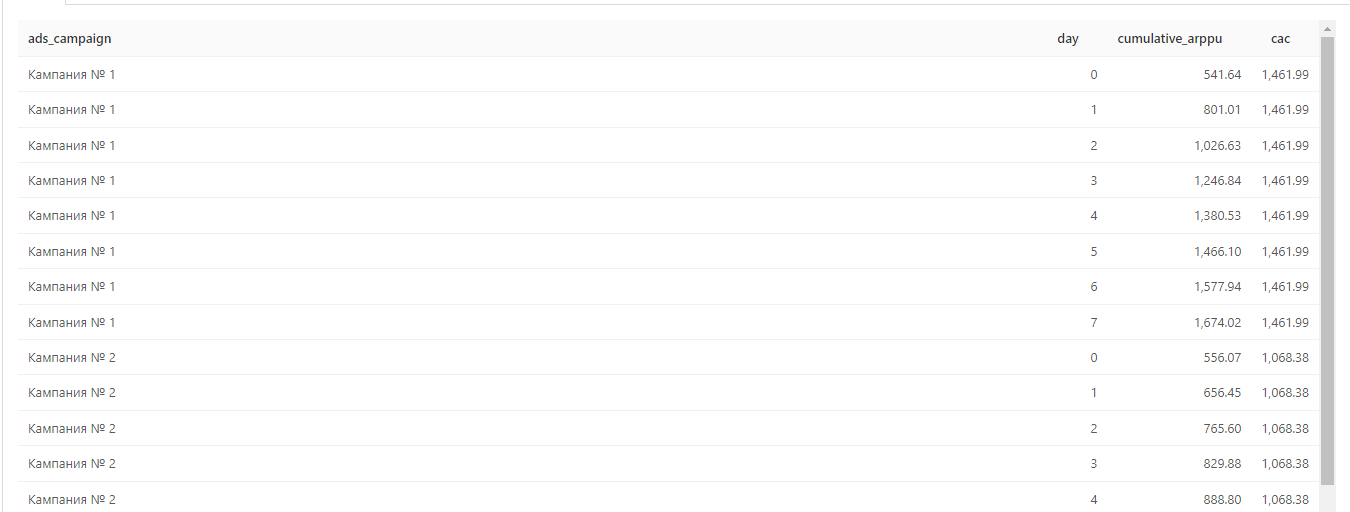

**_График для первой рекламной кампании_**:
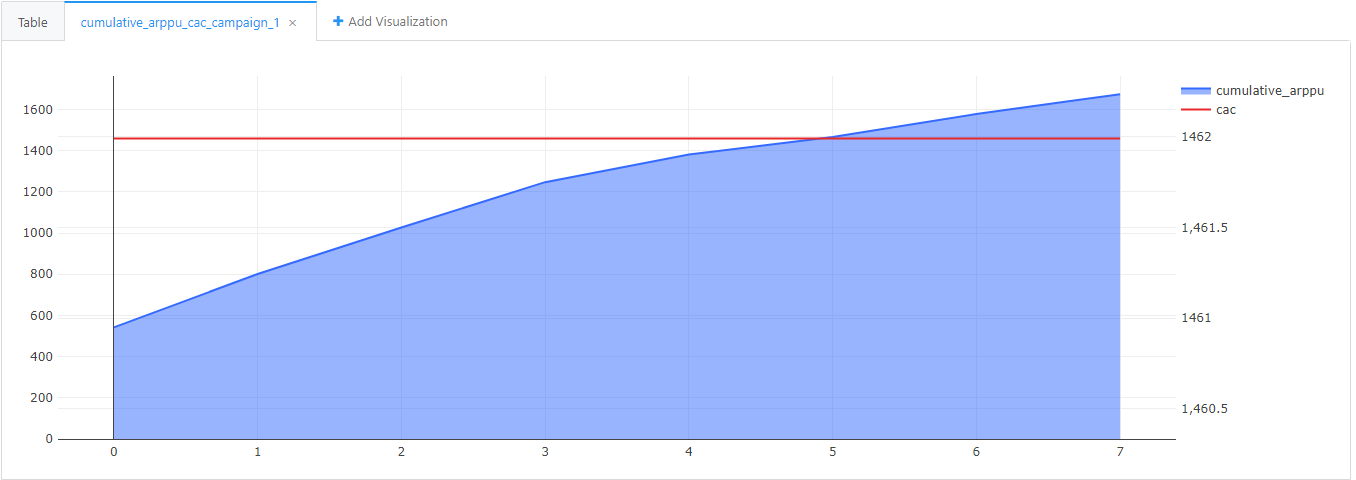

**_График для второй рекламной кампании_**:
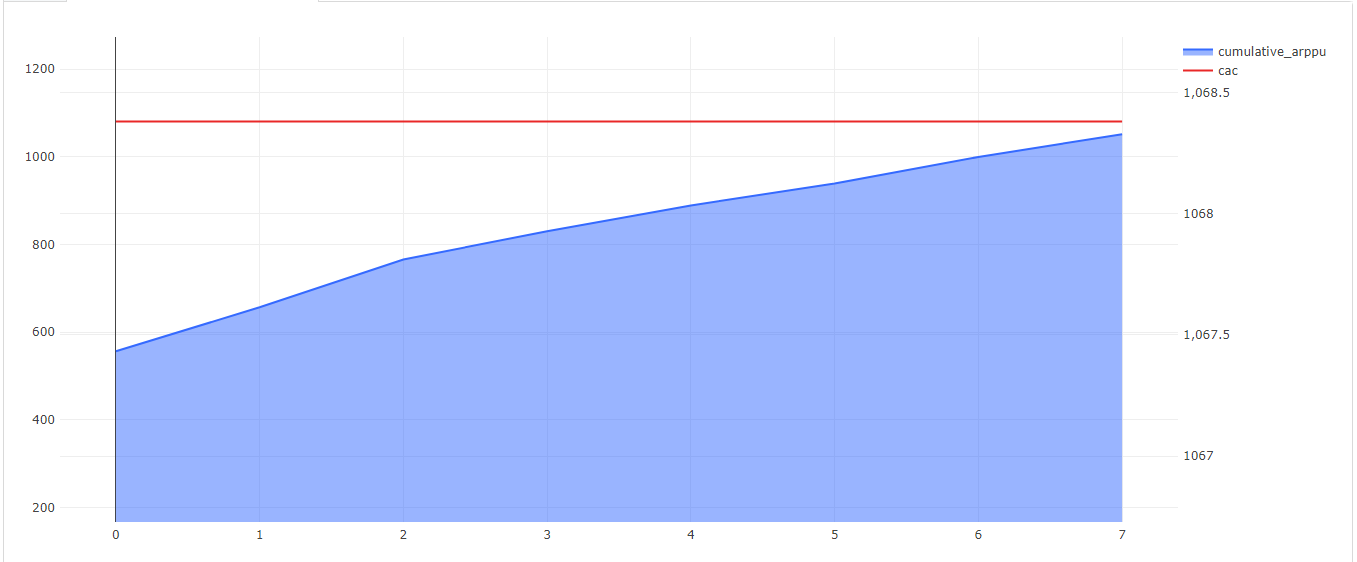

На основе текущих данных видно, что первая рекламная кампания окупилась на 5 день, а 2 реклама не окупилась даже на 7 день.

**ИТОГ**: Рекламная кампания № 1 оказалась более результативной.